In [9]:
import pandas as pd
import plotnine as pn
import numpy as np

In [10]:
df = pd.read_csv("/Users/nathanielimel/uw/projects/modals-effcomm/multirun/universe=experiment_prohibition/prior=-8/utility=half_credit/agent_type=literal/analysis/all_data.csv") # least empirical
df

,complexity,simplicity,informativity,comm_cost,iff,sav,dlsav,deontic_priority,dp_trivial,dp_nontrivial,epistemic_priority,circ_priority,dp_restricted,optimality,natural,dominant,name,dp
0,38,0.486486,0.537222,0.462778,0.555556,0.444444,False,True,False,True,True,True,True,0.675954,False,False,sampled_lang_28320,dp_restricted
1,19,0.743243,0.565972,0.434028,1.000000,0.571429,False,True,False,True,True,True,False,0.851803,False,False,sampled_lang_22020,nontrivial
2,45,0.391892,0.501885,0.498115,0.222222,0.111111,False,True,False,True,True,True,False,0.602774,False,False,sampled_lang_27225,nontrivial
3,12,0.837838,0.370833,0.629167,0.000000,0.000000,False,True,False,True,True,True,True,0.887929,False,False,sampled_lang_1963,dp_restricted
4,14,0.810811,0.555556,0.444444,1.000000,0.400000,False,True,False,True,True,True,False,0.898965,False,False,sampled_lang_13731,nontrivial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35147,19,0.743243,0.583333,0.416667,1.000000,0.714286,False,True,False,True,True,True,False,0.852686,False,False,sampled_lang_21805,nontrivial
35148,23,0.689189,0.515046,0.484954,0.666667,0.500000,False,True,False,True,True,True,False,0.811059,False,False,sampled_lang_16314,nontrivial
35149,20,0.729730,0.462500,0.537500,0.250000,0.250000,False,True,False,True,True,True,True,0.836941,False,False,sampled_lang_7136,dp_restricted
35150,2,0.972973,0.250000,0.750000,1.000000,1.000000,True,False,False,False,True,False,False,0.935835,False,False,wataru_language_1,false


/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 56'. Pick better value with 'binwidth'.


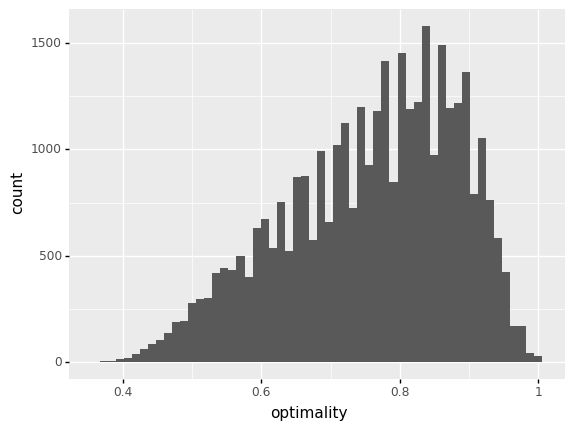

<ggplot: (366036980)>

In [11]:
(
    pn.ggplot(df)
    + pn.geom_histogram(pn.aes(x="optimality"))
)

/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 56'. Pick better value with 'binwidth'.


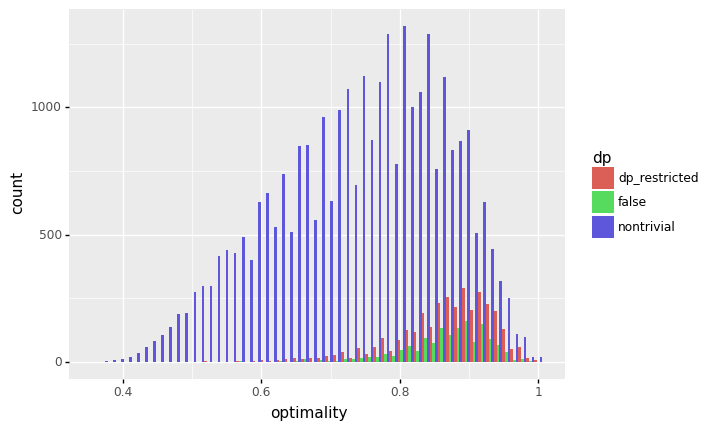

<ggplot: (362297720)>

In [12]:
(
    pn.ggplot(df)
    + pn.geom_histogram(pn.aes(x="optimality", fill="dp"), position="dodge")
)

In [13]:
# collect, for each tolerable level of efficiency loss, the proportion of langs satisfying DP. 

levels = np.linspace(df["optimality"].min(), df["optimality"].max(), num=10)
opt_bins = []
dp_props = []
for i in range(len(levels)-1):
    min = np.round(levels[i], 2)
    max = np.round(levels[i+1], 2)

    level_df = df[df["optimality"].between(min, max)]
    numdp = (level_df["deontic_priority"].value_counts().tolist()[0])

    dp_props.append(numdp / len(level_df))
    opt_bins.append((min, max))


levels_df = pd.DataFrame({"optimality_bin": opt_bins[5:], "prop_dp": dp_props[5:]})
levels_df

,optimality_bin,prop_dp
0,"(0.72, 0.79)",0.982533
1,"(0.79, 0.86)",0.946223
2,"(0.86, 0.93)",0.888720
3,"(0.93, 1.0)",0.902087


/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


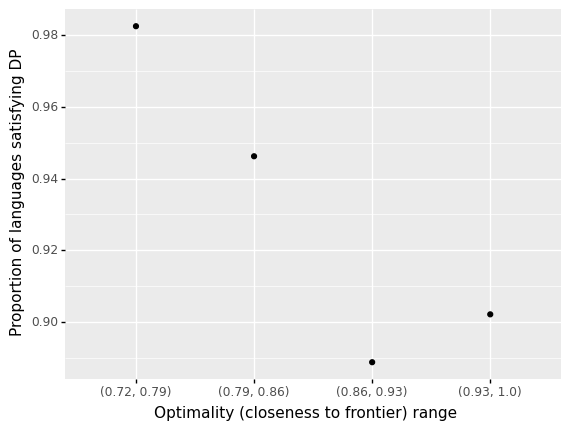

<ggplot: (366012068)>

In [14]:
(
    pn.ggplot(levels_df)
    + pn.geom_point(pn.aes(x="optimality_bin", y="prop_dp"))
    + pn.geom_line(pn.aes(x="optimality_bin", y="prop_dp"))
    + pn.ylab("Proportion of languages satisfying DP")
    + pn.xlab("Optimality (closeness to frontier) range")
)

## Analysis with new, restrictive universal

In [74]:
means_1 = pd.read_csv("/Users/nathanielimel/uw/projects/modals-effcomm/multirun/universe=experiment_prohibition/prior=-8/utility=half_credit/agent_type=literal/analysis/means.csv")
means_1["prior"] = "uniform"
means_1["utility"] = "unbiased"

means_2 = pd.read_csv("/Users/nathanielimel/uw/projects/modals-effcomm/multirun/universe=experiment_prohibition/prior=-8/utility=importance/agent_type=literal/analysis/means.csv")
means_2["prior"] = "uniform"
means_2["utility"] = "importance"

means_3 = pd.read_csv("/Users/nathanielimel/uw/projects/modals-effcomm/multirun/universe=experiment_prohibition/prior=semi_estimated/utility=half_credit/agent_type=literal/analysis/means.csv")
means_3["prior"] = "semi_estimated"
means_3["utility"] = "unbiased"

means_4 = pd.read_csv("/Users/nathanielimel/uw/projects/modals-effcomm/multirun/universe=experiment_prohibition/prior=semi_estimated/utility=importance/agent_type=literal/analysis/means.csv")
means_4["prior"] = "semi_estimated"
means_4["utility"] = "importance"

df = pd.concat([
    means_1, 
    means_2, 
    # means_3, 
    # means_4,
])
df

,name,simplicity,informativity,optimality,prior,utility
0,natural_means,NaN,NaN,NaN,uniform,unbiased
1,dlsav_means,0.818656,0.570023,0.918312,uniform,unbiased
2,deontic_priority_means,0.589313,0.538655,0.753503,uniform,unbiased
3,epistemic_priority_means,0.589486,0.538549,0.753606,uniform,unbiased
4,circ_priority_means,0.589274,0.538647,0.753470,uniform,unbiased
5,dp_restricted_means,0.770061,0.488941,0.864620,uniform,unbiased
6,population_means,0.597647,0.534509,0.758275,uniform,unbiased
0,natural_means,NaN,NaN,NaN,uniform,importance
1,dlsav_means,0.818656,0.361107,0.930484,uniform,importance
2,deontic_priority_means,0.589313,0.345303,0.814678,uniform,importance


In [75]:
df_dp_restricted = df[df['name'].isin(["deontic_priority_means", "epistemic_priority_means", "circ_priority_means", "dp_restricted_means", "population_means"])][["optimality", "informativity", "prior", "utility", "name"]]
df_dp_restricted

,optimality,informativity,prior,utility,name
2,0.753503,0.538655,uniform,unbiased,deontic_priority_means
3,0.753606,0.538549,uniform,unbiased,epistemic_priority_means
4,0.753470,0.538647,uniform,unbiased,circ_priority_means
5,0.864620,0.488941,uniform,unbiased,dp_restricted_means
6,0.758275,0.534509,uniform,unbiased,population_means
2,0.814678,0.345303,uniform,importance,deontic_priority_means
3,0.813975,0.343038,uniform,importance,epistemic_priority_means
4,0.814163,0.343845,uniform,importance,circ_priority_means
5,0.883161,0.318382,uniform,importance,dp_restricted_means
6,0.816861,0.341146,uniform,importance,population_means


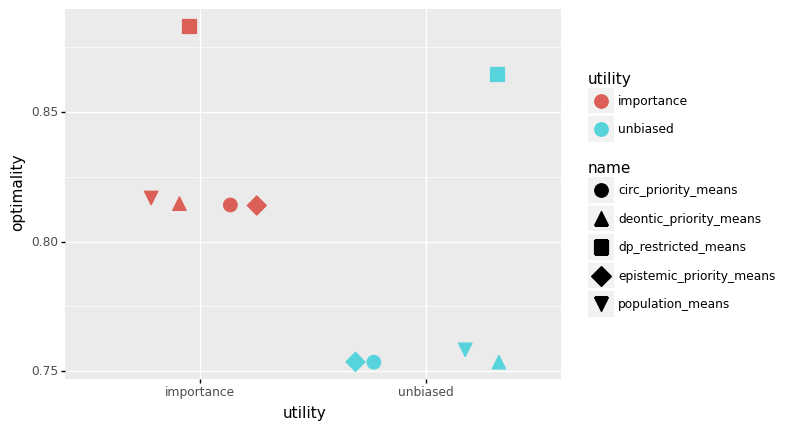

<ggplot: (368148835)>

In [77]:
(
    pn.ggplot(df_dp_restricted)
    + pn.geom_jitter(pn.aes(x="utility", y="optimality", color="utility", shape="name", width=1), size=5)
)